In [ ]:
import tensorflow as tf
import warnings
import numpy as np
import keras
import matplotlib.pyplot as plt 
from keras.layers import *
from keras.layers import LeakyReLU
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.optimizers import Adam

warnings.filterwarnings("ignore")

In [ ]:
(x_train, _),(_,_)=mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=(x_train-127.5)/127.5
print(x_train.min())
print(x_train.max())

-1.0
1.0


In [ ]:
TOTAL_EPOACH=50
BATCH_SIZE=256
HALF_BATCH=128
NO_OF_BATCHES=10
NOISE_DIM=100
adam=Adam(lr=2e-4,beta_1=0.5)

In [ ]:

generator=Sequential()
generator.add(Dense(units=7*7*128,input_shape=(NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(64,(3,3),strides=(2,2),padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

generator.add(Conv2DTranspose(1,(3,3),strides=(2,2),padding='same',activation='tanh'))
generator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)

In [ ]:
generator.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 leaky_re_lu_46 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_23 (Bat  (None, 7, 7, 128)        512       
 chNormalization)                                                
                                                                 
 conv2d_transpose_19 (Conv2D  (None, 14, 14, 64)       73792     
 Transpose)                                                      
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 14, 14, 64)      

In [ ]:
discriminator=Sequential()
discriminator.add(Conv2D(64,(3,3),strides=(2,2),padding='same',input_shape=(28,28,1)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
discriminator.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_31 (Dense)            (None, 100)               627300    
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 100)             

In [ ]:

discriminator.trainable=False
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
gan_output=discriminator(generated_img)
model=Model(gan_input,gan_output)
model.compile(loss=keras.losses.binary_crossentropy,optimizer=adam)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100)]             0         
                                                                 
 sequential_26 (Sequential)  (None, 28, 28, 1)         708609    
                                                                 
 sequential_27 (Sequential)  (None, 1)                 701897    
                                                                 
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [ ]:
x_train=x_train.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
def display_images(samples=25):
  noise=np.random.normal(0.1,size=(samples,NOISE_DIM))
  generated_img=generator.predict(noise)
  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_img[i].reshape(28,28),cmap="binary")
    plt.axis("off")
  plt.show()
    

4/4 [==============================] - 0s 13ms/step
Epoch 1, d_loss 0.541904628276825, g_loss 0.5170809626579285
4/4 [==============================] - 0s 13ms/step
Epoch 2, d_loss 0.36578357219696045, g_loss 0.9059318959712982
1/1 [==============================] - 0s 175ms/step


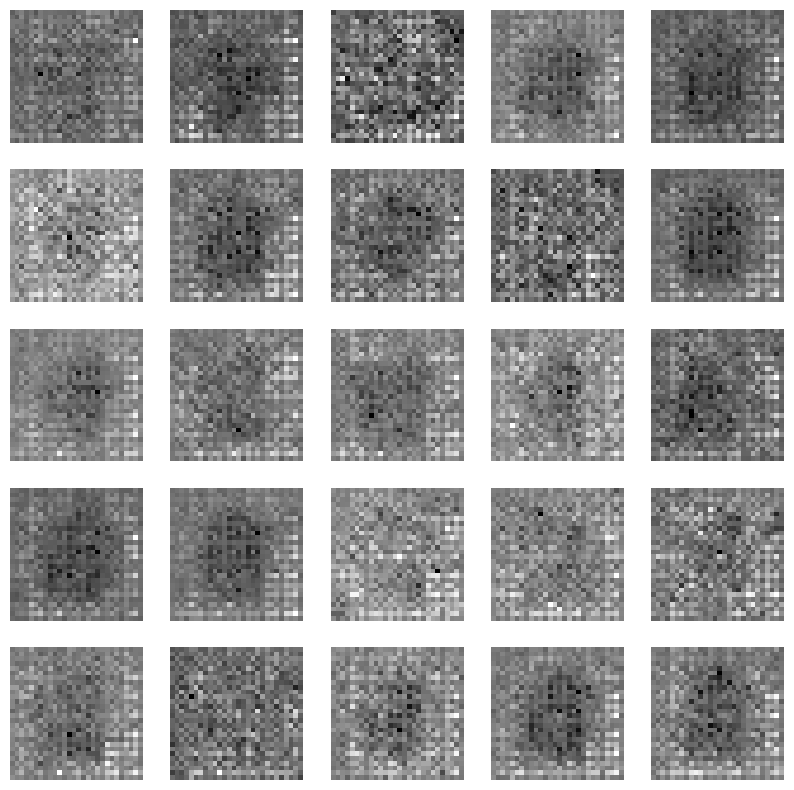

4/4 [==============================] - 0s 18ms/step
Epoch 3, d_loss 0.19427137542515993, g_loss 0.6634066849946976
4/4 [==============================] - 0s 13ms/step
Epoch 4, d_loss 0.171859806869179, g_loss 0.17499828487634658
1/1 [==============================] - 0s 47ms/step


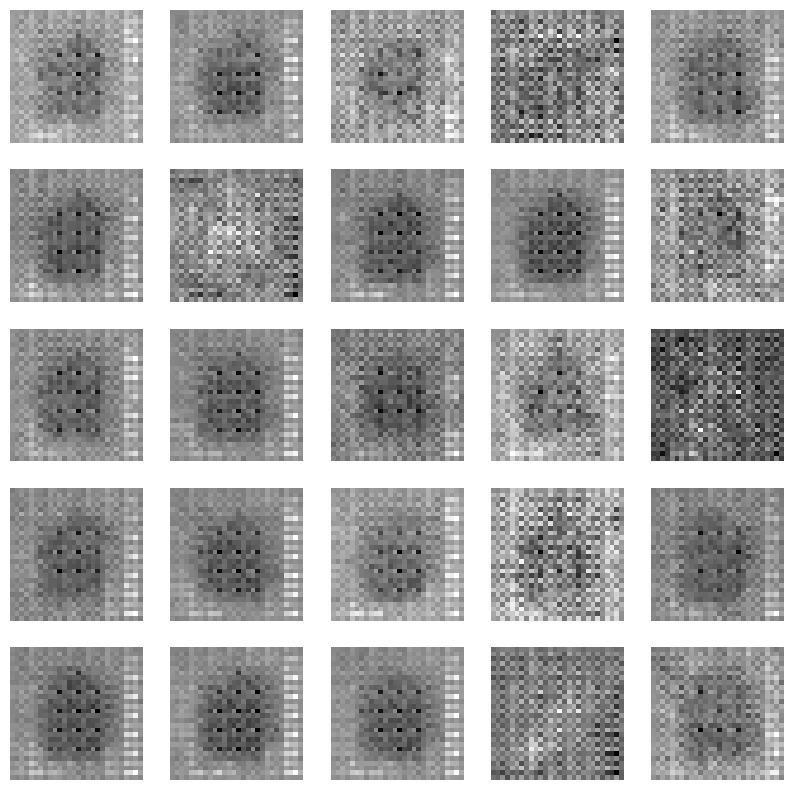

4/4 [==============================] - 0s 14ms/step
Epoch 5, d_loss 0.1671804971061647, g_loss 0.11040989384055137
4/4 [==============================] - 0s 14ms/step
Epoch 6, d_loss 0.16533265671459957, g_loss 0.09001224488019943
1/1 [==============================] - 0s 41ms/step


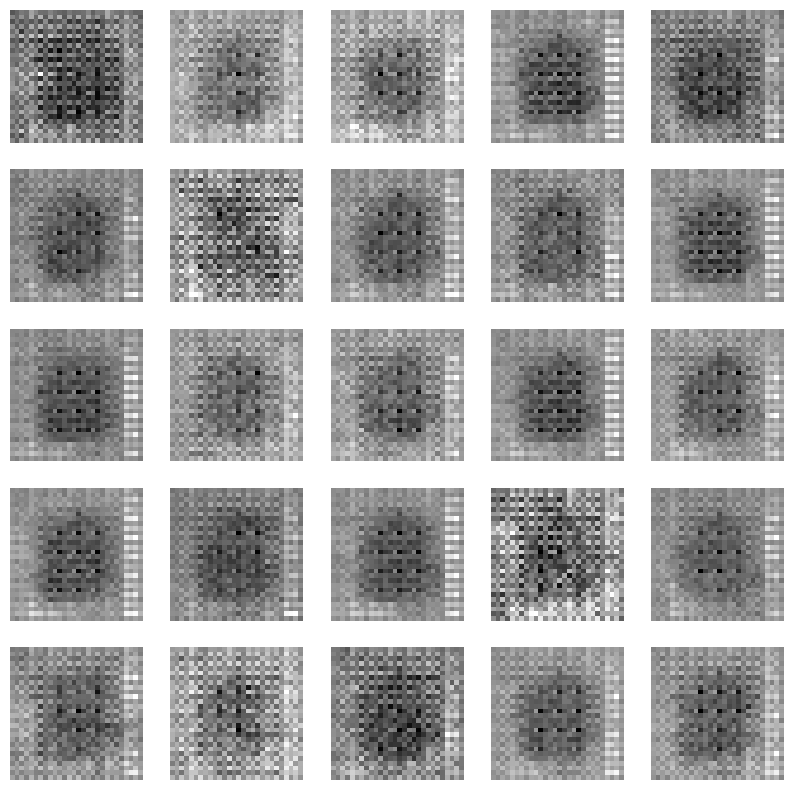

4/4 [==============================] - 0s 14ms/step
Epoch 7, d_loss 0.16655145345721395, g_loss 0.08086574785411357
4/4 [==============================] - 0s 26ms/step
Epoch 8, d_loss 0.164404358365573, g_loss 0.08747584372758865
1/1 [==============================] - 0s 70ms/step


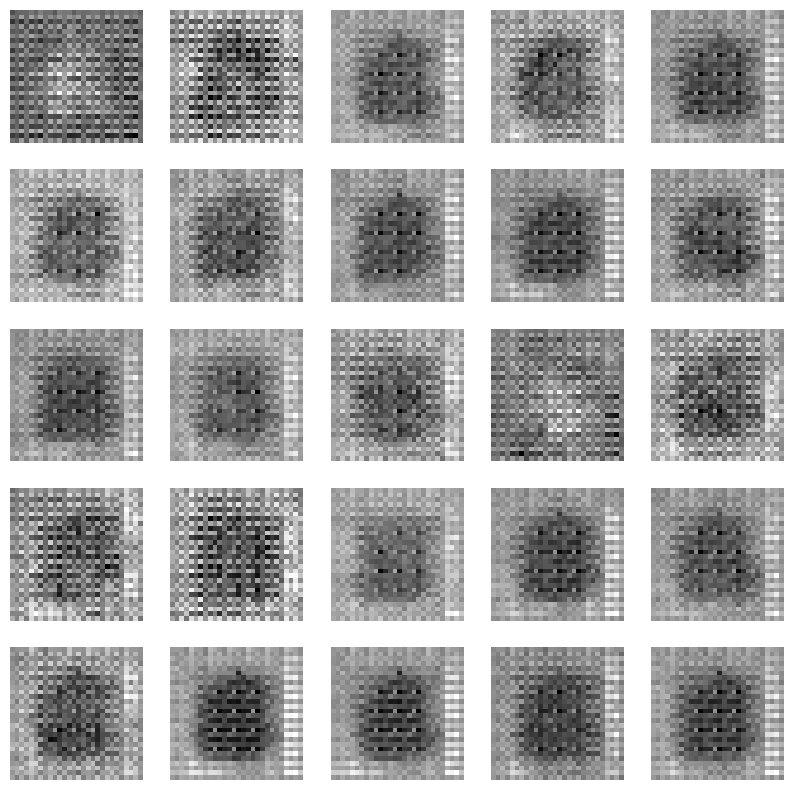

4/4 [==============================] - 0s 15ms/step
Epoch 9, d_loss 0.16428945934167133, g_loss 0.089193457365036
4/4 [==============================] - 0s 14ms/step
Epoch 10, d_loss 0.16625575396465136, g_loss 0.08568187020719051
1/1 [==============================] - 0s 46ms/step


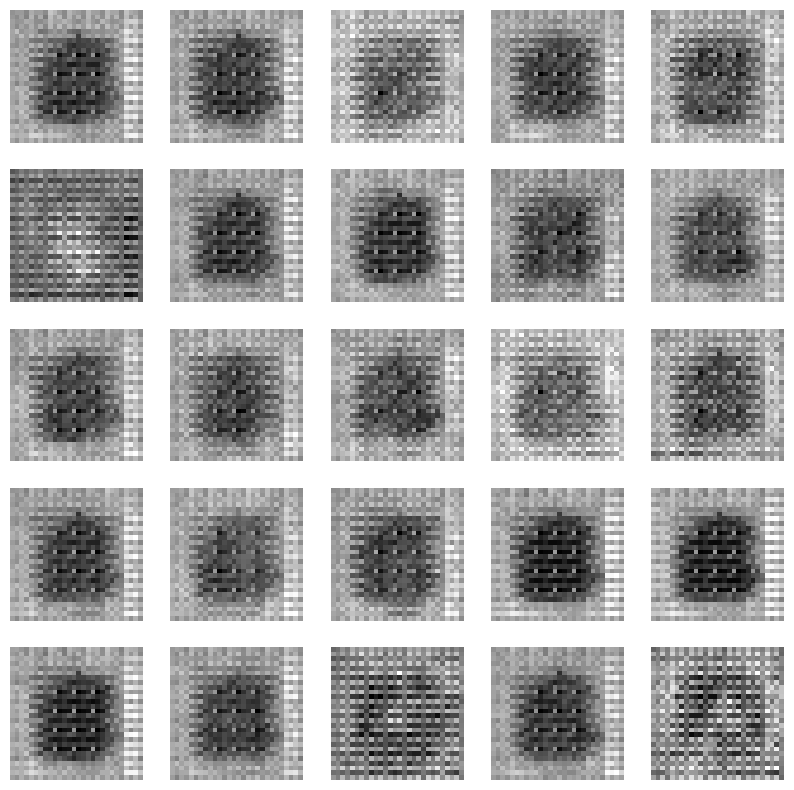

4/4 [==============================] - 0s 18ms/step
Epoch 11, d_loss 0.16379968481487595, g_loss 0.1330369308590889
4/4 [==============================] - 0s 15ms/step
Epoch 12, d_loss 0.16630125617957675, g_loss 0.1760094553232193
1/1 [==============================] - 0s 31ms/step


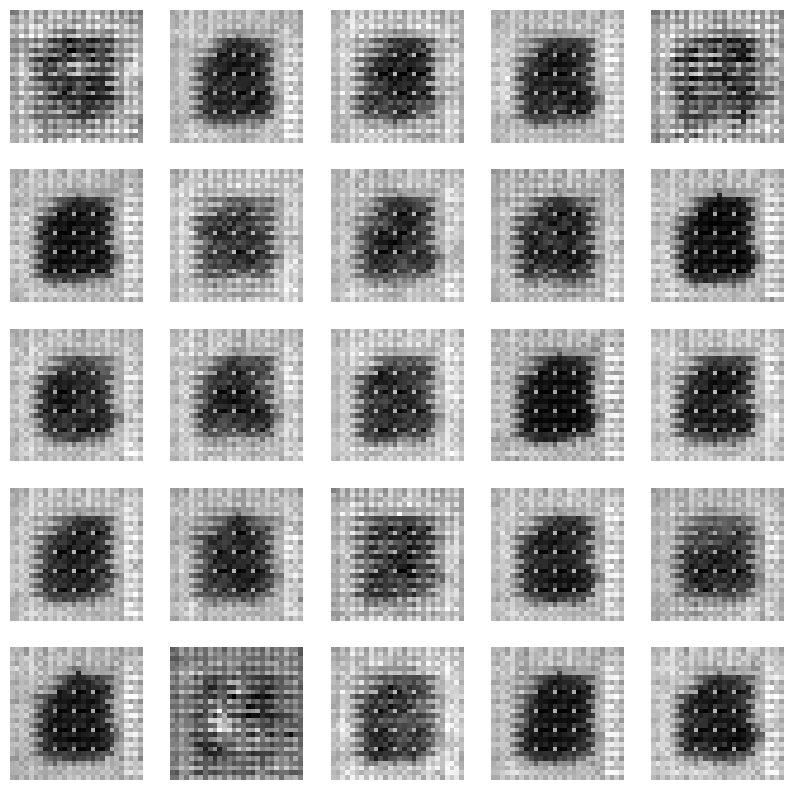

4/4 [==============================] - 0s 15ms/step
Epoch 13, d_loss 0.1671693890122697, g_loss 0.2873322948813438
4/4 [==============================] - 0s 18ms/step
Epoch 14, d_loss 0.17251947757322342, g_loss 0.4661696344614029
1/1 [==============================] - 0s 64ms/step


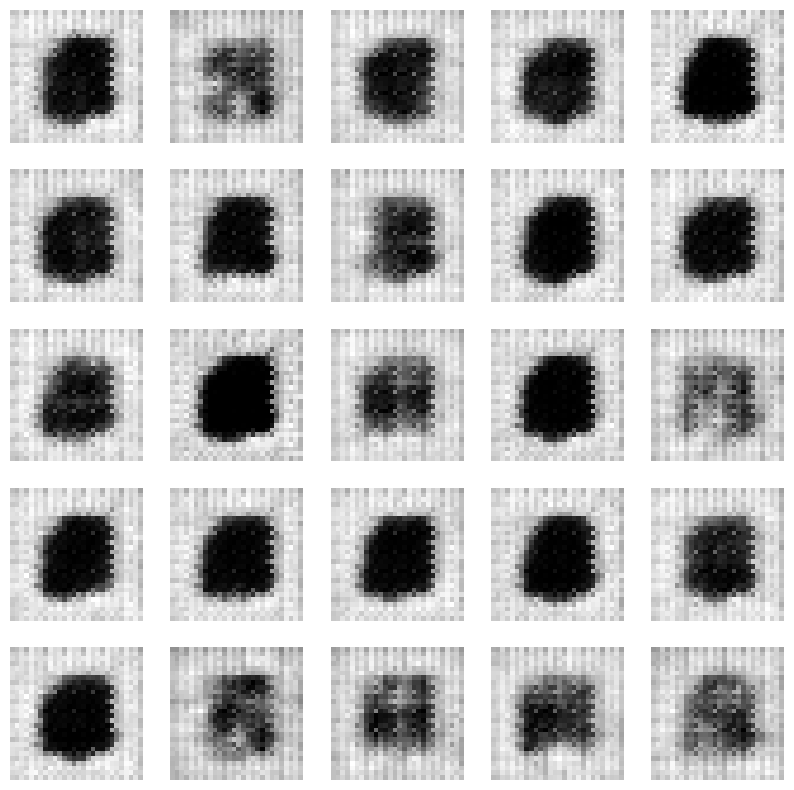

4/4 [==============================] - 0s 18ms/step
Epoch 15, d_loss 0.2908930037752725, g_loss 2.759288215637207
4/4 [==============================] - 0s 19ms/step
Epoch 16, d_loss 0.17841136464849114, g_loss 0.8128016918897629
1/1 [==============================] - 0s 36ms/step


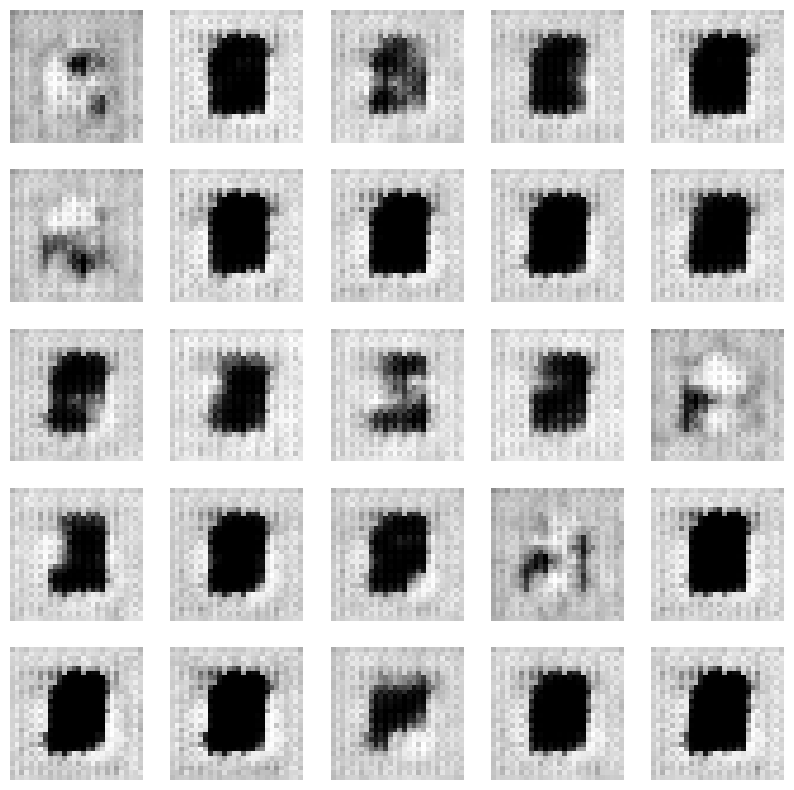

4/4 [==============================] - 0s 22ms/step
Epoch 17, d_loss 0.1984379361383617, g_loss 1.0836193591356278
4/4 [==============================] - 0s 15ms/step
Epoch 18, d_loss 0.1755861724028364, g_loss 0.8458421945571899
1/1 [==============================] - 0s 34ms/step


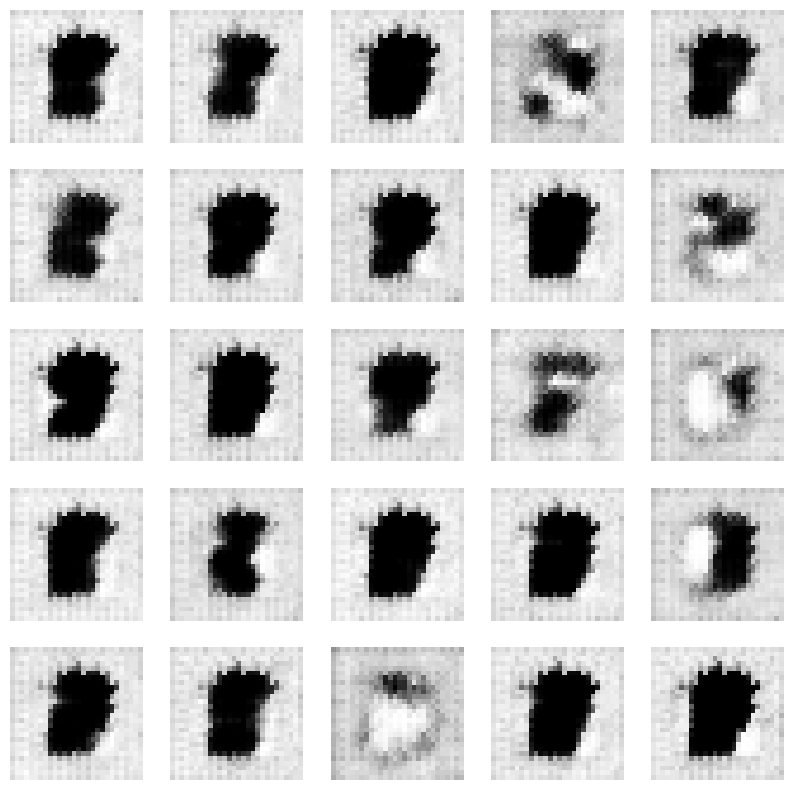

4/4 [==============================] - 0s 16ms/step
Epoch 19, d_loss 0.2486118873115629, g_loss 2.5291979372501374
4/4 [==============================] - 0s 22ms/step
Epoch 20, d_loss 0.17801801620516927, g_loss 1.379344069957733
1/1 [==============================] - 0s 54ms/step


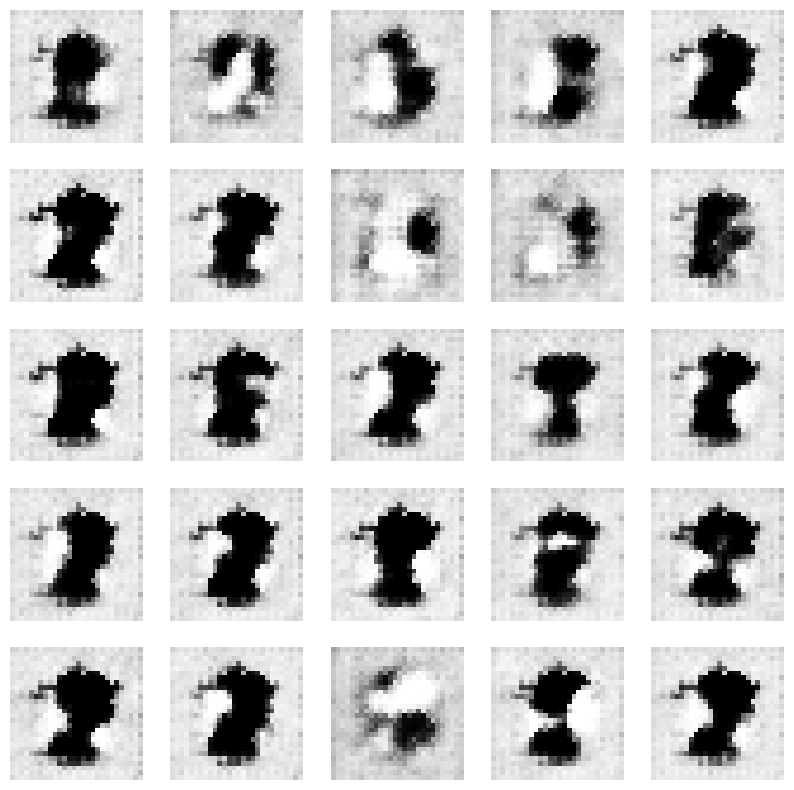

4/4 [==============================] - 0s 20ms/step
Epoch 21, d_loss 0.18376115784049035, g_loss 1.2126376450061798
4/4 [==============================] - 0s 25ms/step
Epoch 22, d_loss 0.6850934060988948, g_loss 3.2561957359313967
1/1 [==============================] - 0s 35ms/step


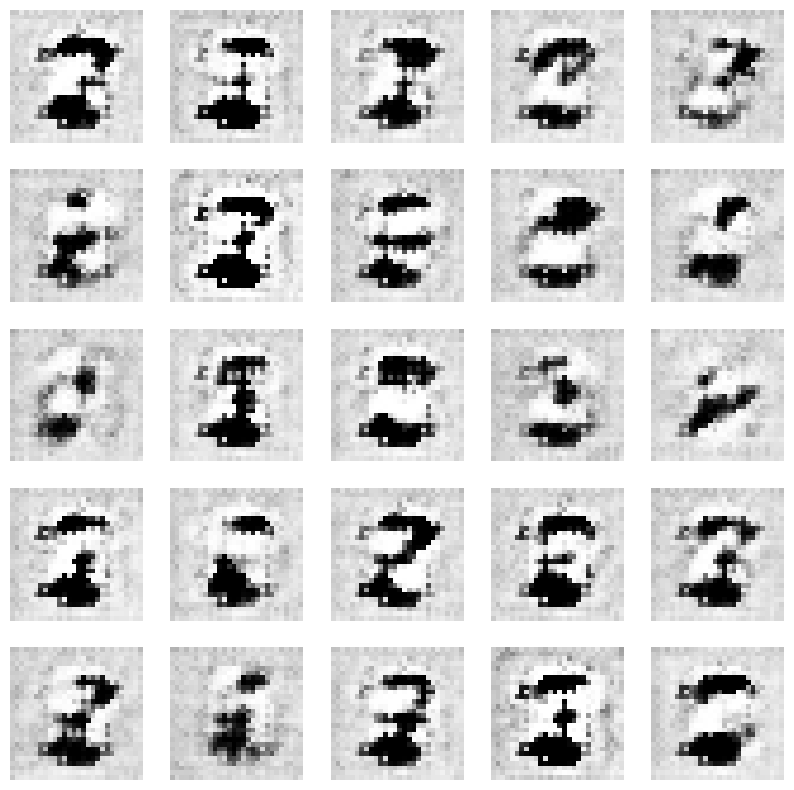

4/4 [==============================] - 0s 26ms/step
Epoch 23, d_loss 0.4179019659757614, g_loss 2.1152130007743835
4/4 [==============================] - 0s 18ms/step
Epoch 24, d_loss 0.3150607910007238, g_loss 1.9659898161888123
1/1 [==============================] - 0s 32ms/step


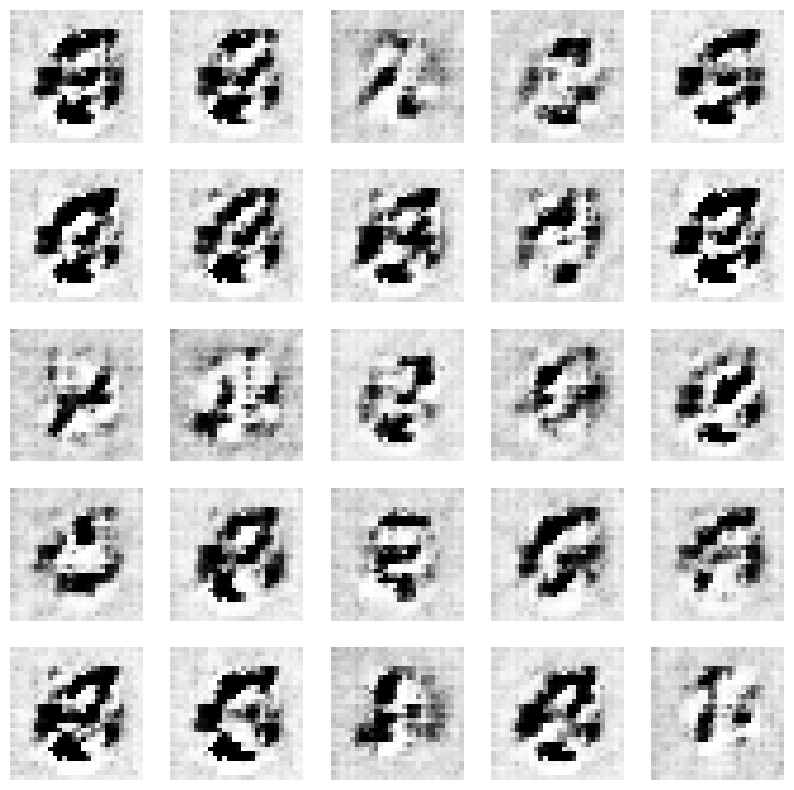

4/4 [==============================] - 0s 20ms/step
Epoch 25, d_loss 0.25787149295210837, g_loss 1.7935310125350952
4/4 [==============================] - 0s 21ms/step
Epoch 26, d_loss 0.25534136444330213, g_loss 1.6916105508804322
1/1 [==============================] - 0s 48ms/step


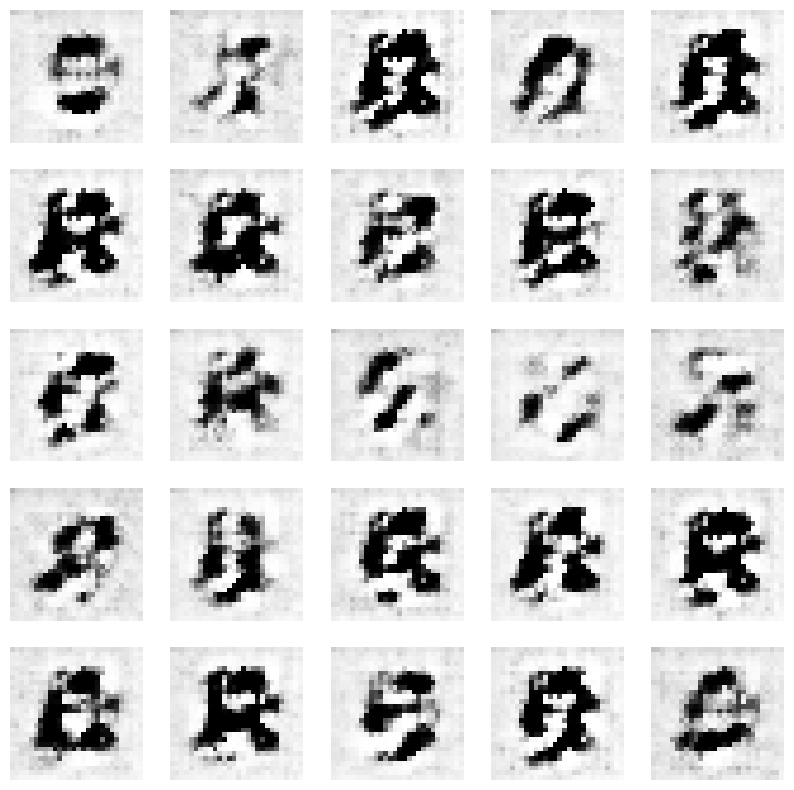

4/4 [==============================] - 0s 18ms/step
Epoch 27, d_loss 0.264969352632761, g_loss 1.8593116760253907
4/4 [==============================] - 0s 17ms/step
Epoch 28, d_loss 0.4040076721459627, g_loss 2.794970953464508
1/1 [==============================] - 0s 31ms/step


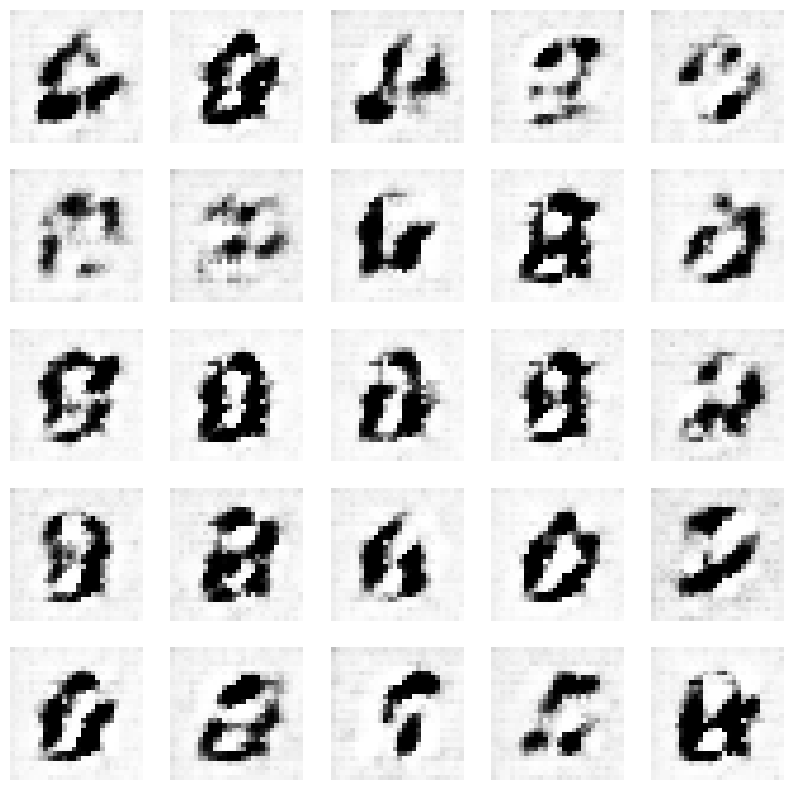

4/4 [==============================] - 0s 32ms/step
Epoch 29, d_loss 0.4636953953653574, g_loss 2.800242877006531
4/4 [==============================] - 0s 20ms/step
Epoch 30, d_loss 0.564254866540432, g_loss 2.7160537242889404
1/1 [==============================] - 0s 30ms/step


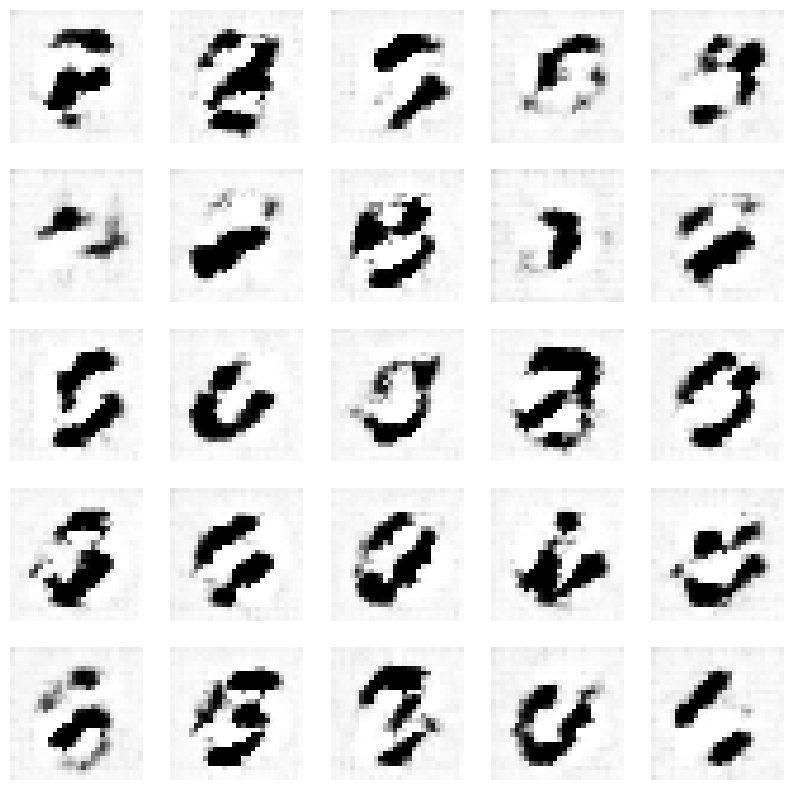

4/4 [==============================] - 0s 16ms/step
Epoch 31, d_loss 0.5706551015377045, g_loss 2.5212178468704223
4/4 [==============================] - 0s 17ms/step
Epoch 32, d_loss 0.5793644428253174, g_loss 2.152933490276337
1/1 [==============================] - 0s 54ms/step


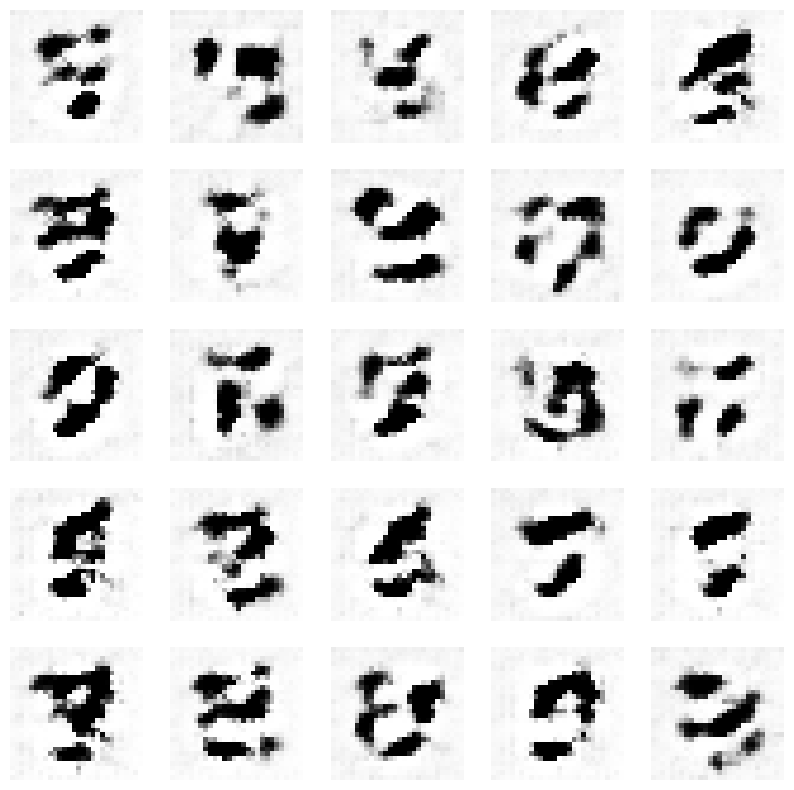

4/4 [==============================] - 0s 22ms/step
Epoch 33, d_loss 0.5559048309922219, g_loss 1.9781444549560547
4/4 [==============================] - 0s 19ms/step
Epoch 34, d_loss 0.5665919244289398, g_loss 2.0067383646965027
1/1 [==============================] - 0s 31ms/step


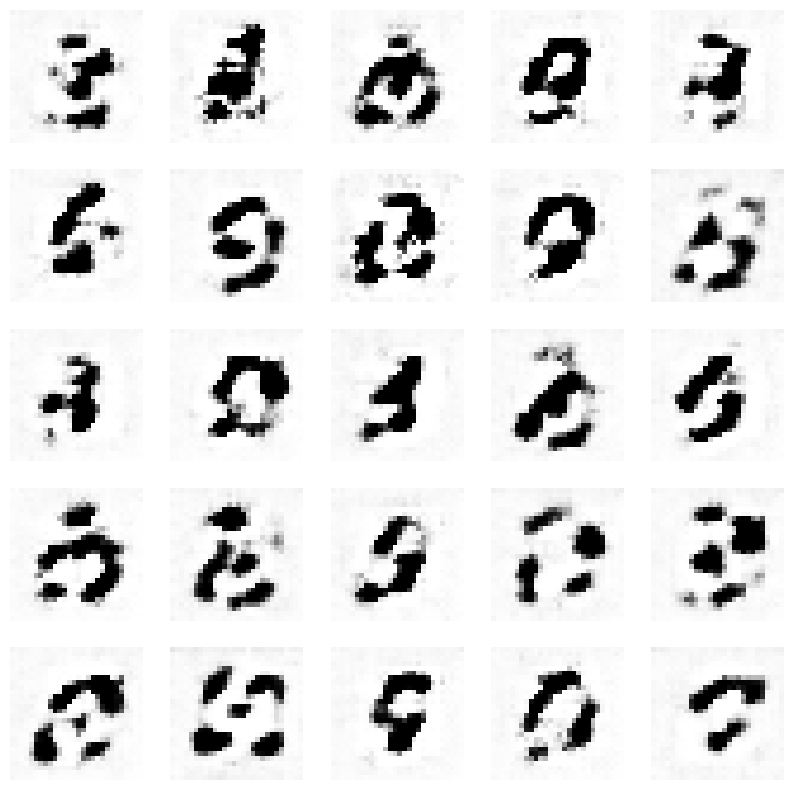

4/4 [==============================] - 0s 18ms/step
Epoch 35, d_loss 0.672789117693901, g_loss 1.9388416886329651
4/4 [==============================] - 0s 19ms/step
Epoch 36, d_loss 0.6693352669477463, g_loss 1.8545793533325194
1/1 [==============================] - 0s 31ms/step


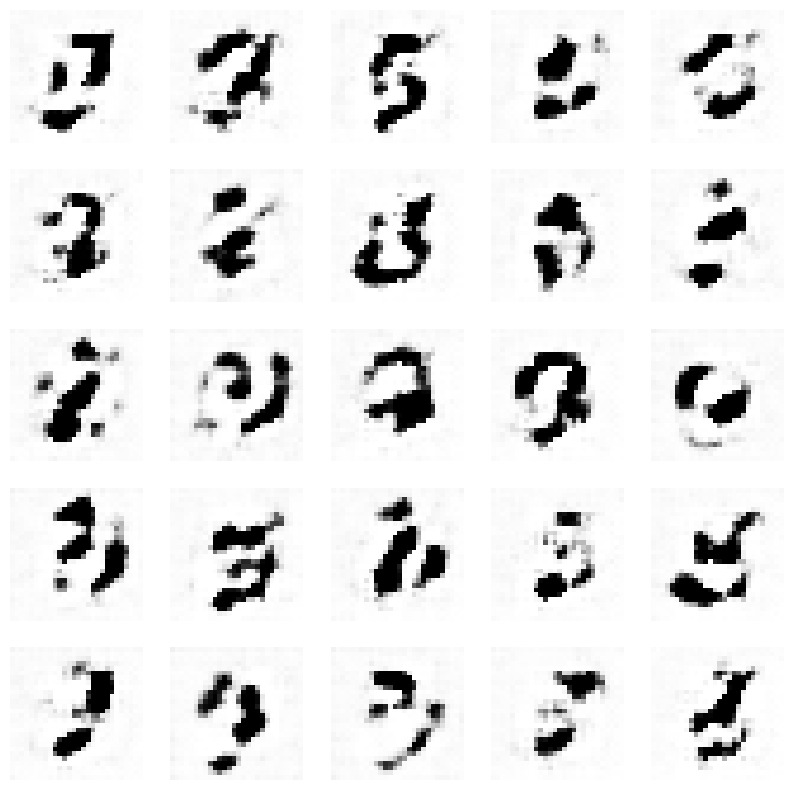

4/4 [==============================] - 0s 18ms/step
Epoch 37, d_loss 0.6571672260761261, g_loss 1.688081932067871
4/4 [==============================] - 0s 16ms/step
Epoch 38, d_loss 0.6482553109526634, g_loss 1.5857271075248718
1/1 [==============================] - 0s 33ms/step


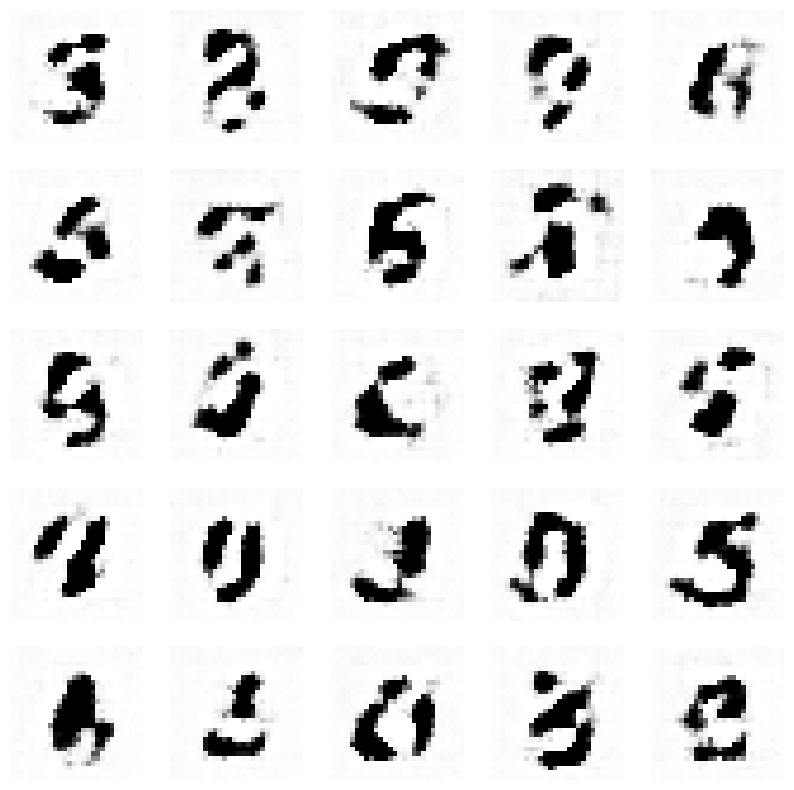

4/4 [==============================] - 0s 17ms/step
Epoch 39, d_loss 0.6416595295071602, g_loss 1.5373892068862915
4/4 [==============================] - 0s 20ms/step
Epoch 40, d_loss 0.64657414406538, g_loss 1.4685517787933349
1/1 [==============================] - 0s 32ms/step


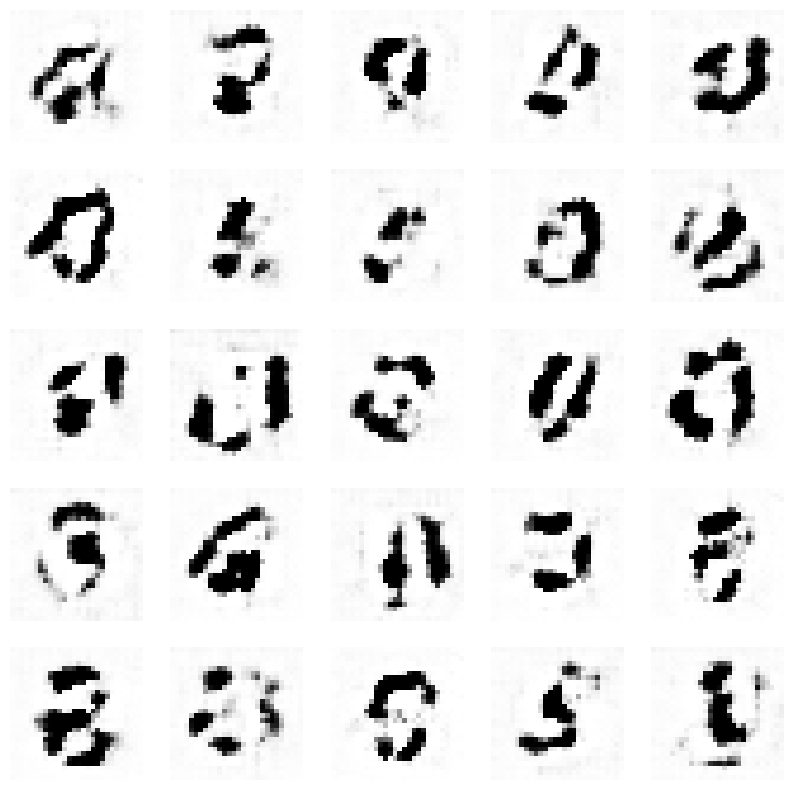

4/4 [==============================] - 0s 18ms/step
Epoch 41, d_loss 0.6271409243345261, g_loss 1.3972405910491943
4/4 [==============================] - 0s 20ms/step
Epoch 42, d_loss 0.6083127528429031, g_loss 1.4625691294670105
1/1 [==============================] - 0s 50ms/step


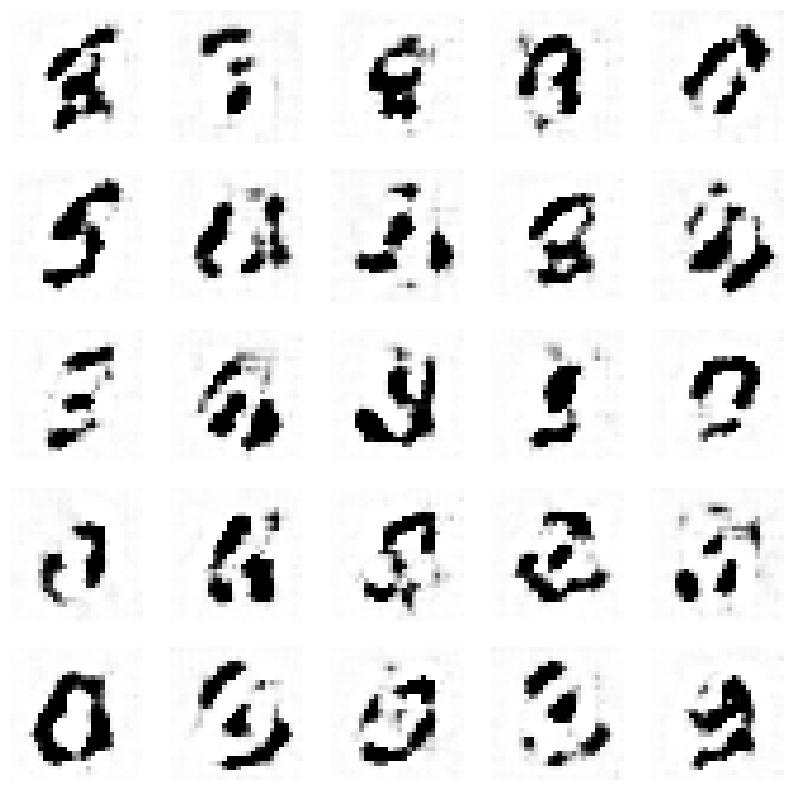

4/4 [==============================] - 0s 19ms/step
Epoch 43, d_loss 0.6055561661720276, g_loss 1.4741627097129821
4/4 [==============================] - 0s 17ms/step
Epoch 44, d_loss 0.6421711951494217, g_loss 1.4678810715675354
1/1 [==============================] - 0s 31ms/step


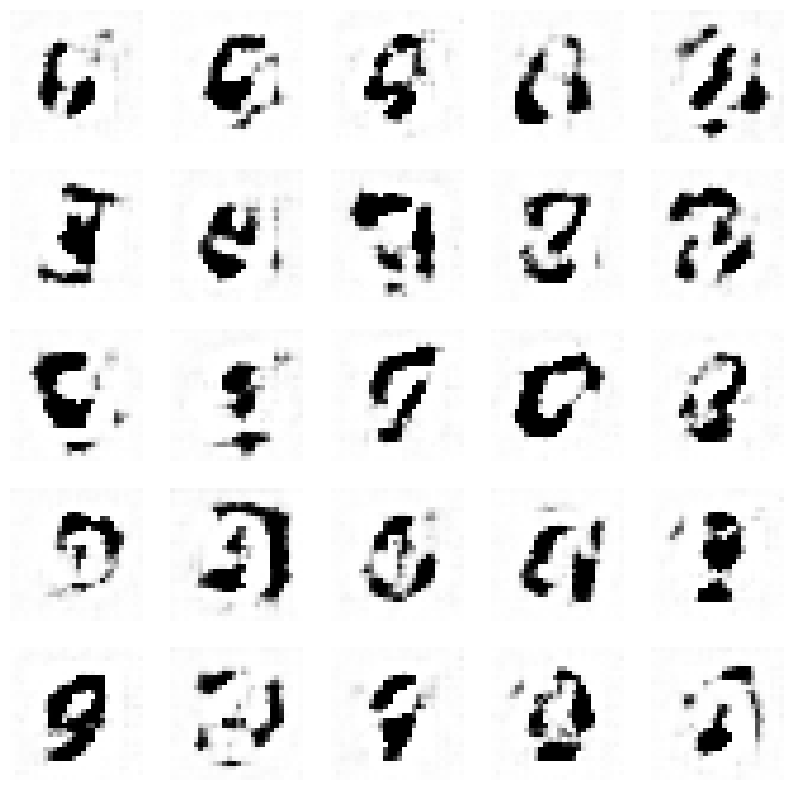

4/4 [==============================] - 0s 22ms/step
Epoch 45, d_loss 0.6273753315210342, g_loss 1.4235727310180664
4/4 [==============================] - 0s 19ms/step
Epoch 46, d_loss 0.6085528865456581, g_loss 1.4354576587677002
1/1 [==============================] - 0s 35ms/step


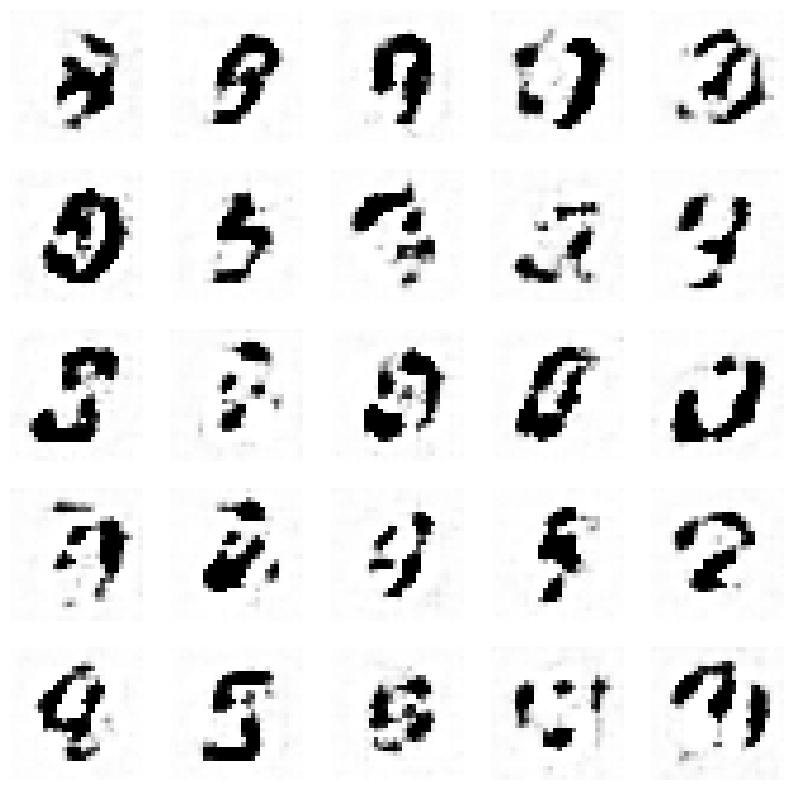

4/4 [==============================] - 0s 18ms/step
Epoch 47, d_loss 0.6012489497661591, g_loss 1.4375498652458192
4/4 [==============================] - 0s 18ms/step
Epoch 48, d_loss 0.6137523427605629, g_loss 1.4719753980636596
1/1 [==============================] - 0s 46ms/step


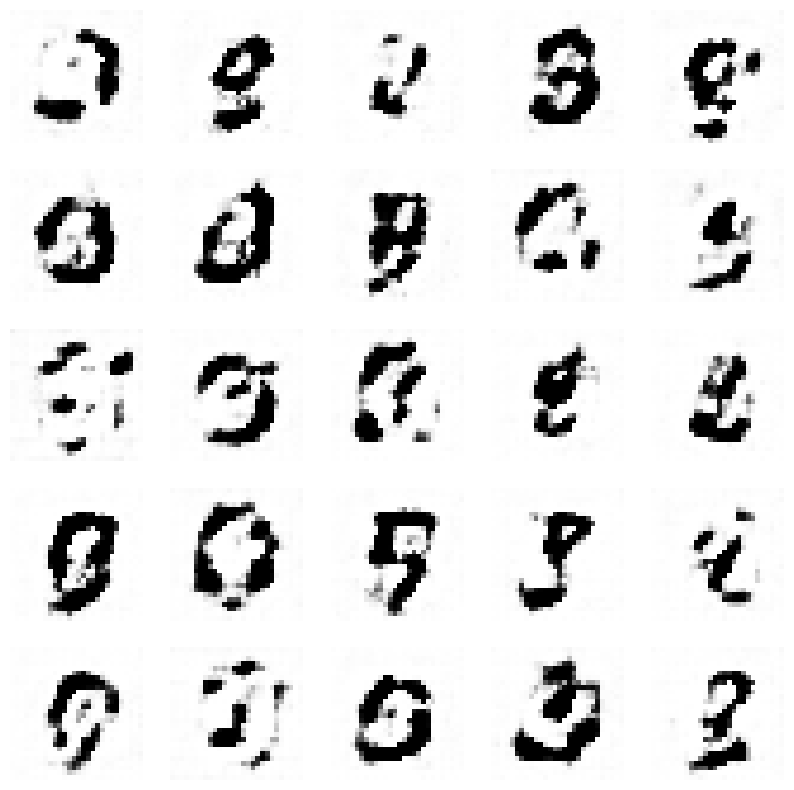

4/4 [==============================] - 0s 17ms/step
Epoch 49, d_loss 0.6347386568784714, g_loss 1.4409595727920532
4/4 [==============================] - 0s 17ms/step
Epoch 50, d_loss 0.6218163996934891, g_loss 1.4532795786857604
1/1 [==============================] - 0s 34ms/step


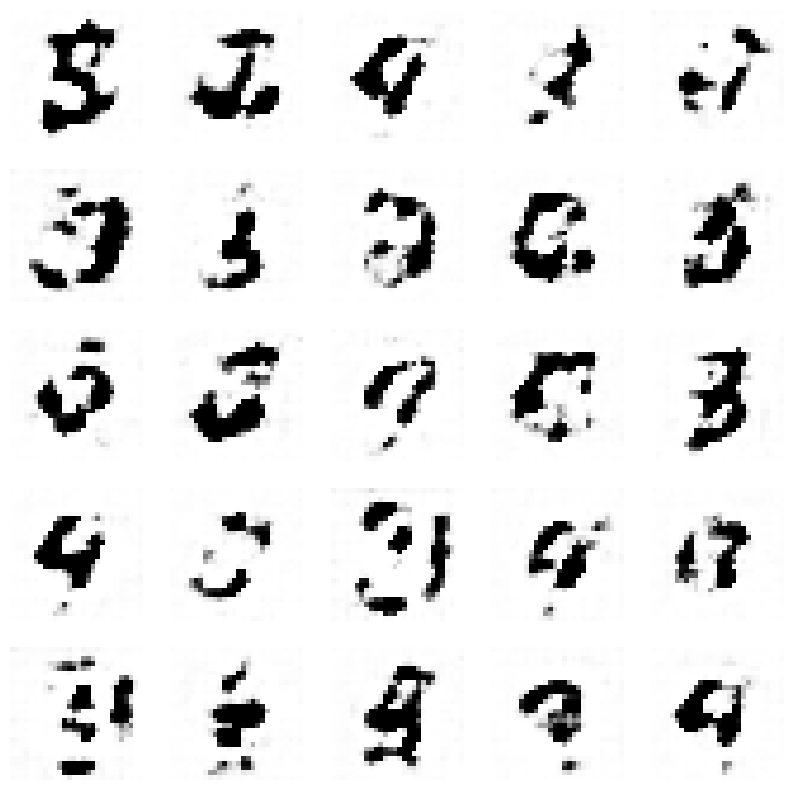

In [ ]:
d_losses=[]
g_losses=[]
for epoch in range(TOTAL_EPOACH):
  epoch_d_loss=0.0
  epoch_g_loss=0.0
  for step in range(NO_OF_BATCHES):
    #Train Dicriminator
    discriminator.trainable=True
    idx=np.random.randint(0,60000,HALF_BATCH)
    real_imgs=x_train[idx]
    noise=np.random.normal(0.1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs=generator.predict(noise)
    #labels
    real_y=np.ones((HALF_BATCH,1))*0.9
    fake_y=np.zeros((HALF_BATCH,1))
    d_loss_real=discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake=discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss=0.5*d_loss_real+0.5*d_loss_fake
    epoch_d_loss+=d_loss

    discriminator.trainable=False
    noise=np.random.normal(0.1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y=np.ones((BATCH_SIZE,1))
    g_loss=model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss+=g_loss

  #display
  print(f"Epoch {epoch+1}, d_loss {epoch_d_loss/NO_OF_BATCHES}, g_loss {epoch_g_loss/NO_OF_BATCHES}")
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)
  if (epoch+1)%2==0:
    generator.save("generator.h5")
    display_images()

      

In [1]:
display_images()

NameError: ignored